# 📘 **Regression Modeling for Prediction Using Python**

"""
### Description of the Data

This dataset contains housing information for properties in King County, USA, including Seattle. The data includes details such as house prices, the number of bedrooms and bathrooms, square footage, year built, and additional attributes like waterfront views and renovations.

#### Key Columns:
- **price**: The sale price of the house (target variable).
- **bedrooms**: Number of bedrooms.
- **bathrooms**: Number of bathrooms.
- **sqft_living**: Square footage of the living area.
- **sqft_lot**: Square footage of the lot.
- **floors**: Number of floors.
- **waterfront**: Whether the house has a waterfront view (0 or 1).
- **view**: The quality of the view from the house.
- **condition**: Condition of the house (scale of 1 to 5).
- **grade**: Overall grade given to the housing unit, based on King County grading system.
- **yr_built**: The year the house was built.
- **yr_renovated**: The year the house was renovated (0 if not renovated).
- **zipcode**: The property's ZIP code.
- **lat**: Latitude coordinate.
- **long**: Longitude coordinate.

This dataset is used to develop predictive models to estimate house prices based on the given features. The models explore data preprocessing techniques, multicollinearity checks, and model evaluation metrics like RMSE and MAPE.

#### Prepared by:
**Prof. Sreejesh S.**
Associate Professor at IIM Kozhikode
For teaching his **Executive Management Development Program (EMDP)courses**


## 📚 **Detailed Description of the Code Libraries and Functions**

### 1. **Data Manipulation Libraries**

#### `pandas`
- **Description**: `pandas` is a powerful library for data manipulation and analysis in Python. It provides data structures like `DataFrame` and `Series` to handle and analyze structured data.
- **Common Functions Used**:
  - `pd.read_csv()`: Reads data from a CSV file and loads it into a DataFrame.
  - `df.dropna()`: Removes rows with missing values.
  - `df.drop(columns=[])`: Drops specified columns from the DataFrame.
  - `df['column'].astype('category')`: Converts a column to a categorical data type.

#### `numpy`
- **Description**: `numpy` is a library for numerical computations in Python. It supports large multi-dimensional arrays and matrices.
- **Common Functions Used**:
  - `np.sqrt()`: Calculates the square root.
  - `np.mean()`: Calculates the mean of an array.
  - `np.abs()`: Returns the absolute values of an array.

---

### 2. **Model Development Libraries**

#### `sklearn.model_selection`
- **Description**: Provides functions to split datasets for model training and evaluation.
- **Function Used**:
  - `train_test_split()`: Splits data into training and testing sets.

#### `sklearn.linear_model`
- **Description**: Contains linear models for regression and classification tasks.
- **Function Used**:
  - `LinearRegression()`: Fits a linear regression model to the data.

#### `sklearn.ensemble`
- **Description**: Provides ensemble methods for combining multiple models.
- **Function Used**:
  - `RandomForestRegressor()`: Fits a random forest regression model to the data, useful for non-linear relationships.

---

### 3. **Model Evaluation Libraries**

#### `sklearn.metrics`
- **Description**: Contains metrics to evaluate model performance.
- **Functions Used**:
  - `mean_squared_error()`: Calculates the Mean Squared Error (MSE) between actual and predicted values.
  - `r2_score()`: Computes the R² (coefficient of determination) score to evaluate the model's performance.

---

### 4. **Data Visualization Libraries**

#### `matplotlib.pyplot`
- **Description**: The core library for creating static, animated, and interactive plots in Python.
- **Common Functions Used**:
  - `plt.figure()`: Creates a new figure for plotting.
  - `plt.scatter()`: Creates scatter plots.
  - `plt.xlabel()`, `plt.ylabel()`: Labels the x and y axes.
  - `plt.title()`: Adds a title to the plot.
  - `plt.show()`: Displays the plot.

#### `seaborn`
- **Description**: Built on top of `matplotlib`, `seaborn` provides a high-level interface for creating attractive and informative statistical graphics.
- **Common Function Used**:
  - `sns.scatterplot()`: Creates scatter plots with additional features like color and size based on data values.

---

### 5. **Statistical Libraries**

#### `statsmodels.api`
- **Description**: A library for estimating and testing statistical models.
- **Usage**: Provides comprehensive statistical tests and modeling techniques.

#### `statsmodels.stats.outliers_influence`
- **Description**: Provides functions to analyze multicollinearity and detect outliers.
- **Function Used**:
  - `variance_inflation_factor()`: Calculates the Variance Inflation Factor (VIF) to detect multicollinearity among predictors. A high VIF indicates that the feature is highly correlated with other features.

---

### 6. **Workflow Overview**

1. **Data Loading**:  
   Load the dataset using `pandas`.

2. **Data Preprocessing**:  
   Handle missing values, convert necessary columns to categorical types, and perform feature engineering (e.g., calculating house age).

3. **Train-Test Split**:  
   Split the data into training and testing sets.

4. **Model Training**:  
   Fit a `LinearRegression` or `RandomForestRegressor` model on the training data.

5. **Model Evaluation**:  
   Evaluate the model using metrics like RMSE (Root Mean Squared Error) and R² score. Visualize residuals to identify outliers.

6. **Multicollinearity Check**:  
   Use `variance_inflation_factor` to check for multicollinearity among predictors.

7. **Visualization**:  
   Use `matplotlib` and `seaborn` for plotting data and model results.


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
# Load the dataset
df = pd.read_csv('kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


### 🏠 **Step 1: Creating date column as Date vector**
### 📅 **Description of Date Conversion**

This step converts the `'date'` column in the dataset from a string format to a **datetime object** using the `pd.to_datetime()` function from the `pandas` library. The `format` parameter specifies the exact structure of the date string.

---

### 🗓️ **Format Breakdown**

- **`%Y`**: Year with four digits (e.g., 2023).  
- **`%m`**: Month with two digits (01-12).  
- **`%d`**: Day with two digits (01-31).  
- **`T`**: The literal character `T` separates the date and time.  
- **`%H`**: Hour in 24-hour format (00-23).  
- **`%M`**: Minutes (00-59).  
- **`%S`**: Seconds (00-59).  

---

### 🔄 **Example**

- **Before Conversion**: `'20141013T000000'`  
- **After Conversion**: `2014-10-13 00:00:00`  

---

### ✅ **Benefits of Conversion**

- Enables **date-based calculations** (e.g., calculating the age of the house).  
- Facilitates **sorting and filtering** by date.  
- Allows extraction of specific components like **year, month, or day** for analysis.  


In [3]:
# Step 1: Convert the 'date' column to a datetime series
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


### 🏠 **Step 2: Calculate the Age of the House**

This step calculates the **age of each house** by determining the difference between the year extracted from the `'date'` column and the year the house was built (`'yr_built'`). The result is stored in a new column named `'age'`.


In [4]:
# Step 2: Calculate the age of the house by taking the difference between 'date' and 'yr_built'
df['age'] = df['date'].dt.year - df['yr_built']



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1.0,0,0,...,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2.0,0,0,...,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,63
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1.0,0,0,...,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1.0,0,0,...,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,49
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1.0,0,0,...,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,28


### 🌊 **Step 3: Declare 'waterfront' as a Categorical Variable**

This step converts the `'waterfront'` column to a **categorical variable** using the `astype()` function from the `pandas` library.ry')


In [5]:
 #Step 3: Declare 'waterfront' as a categorical variable
df['waterfront'] = df['waterfront'].astype('category')

### 🛠️ **Step 4: Convert 'yr_renovated' to a Binary Format and Declare as a Categorical Variable**

This step converts the `'yr_renovated'` column into a **binary format** (1 if the house has been renovated, 0 otherwise) and declares it as a **categorical variable**.




In [6]:
# Step 4: Convert 'yr_renovated' to a binary format (1 if renovated, 0 otherwise) and declare as a categorical variable
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0).astype('category')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1.0,0,0,...,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2.0,0,0,...,2170.0,400,1951,1,98125,47.7210,-122.319,1690,7639,63
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1.0,0,0,...,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1.0,0,0,...,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,49
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1.0,0,0,...,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,28


### 🗑️ **Step 5: Drop Specified Columns**

This step removes unnecessary columns from the dataset to simplify analysis and model buildinglumns)


In [7]:
# Step 5: Drop specified columns
drop_columns = ['id', 'date', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode', 'lat', 'long']
df = df.drop(columns=drop_columns)

### 🚫 **Step 6: Drop Rows with Missing Values After Checking for Missing Data**

This step removes rows with missing values from the dataset to ensure data integrity for analysis and model buildingpna()


In [8]:
# Step 6: Drop rows with missing values after checking for missing data
df = df.dropna()

### 🎯 **Define the Target Variable and Features**

This step defines the **target variable** (what we want to predict) and the **features** (the inputs used for prediction).
Different from R, in Python we need to separate the Dv and IVs


In [9]:
# Define the target variable and features
target = 'price'
X = df.drop(columns=[target])
y = df[target]

### ✂️ **Train-Test Split**

This step splits the dataset into **training** and **testing** sets to evaluate the performance of the predictive model.

**Parameters**
X: The feature matrix (predictor variables).
y: The target variable (what we want to predict).
test_size=0.2:
Specifies that 20% of the data will be used for the testing set.
The remaining 80% will be used for the training set.
random_state=1234:
Sets a seed for the random number generator to ensure reproducibility.
The same split will occur every time the code is run.

**Why Split the Data?**
Training Set:
The model learns from this data.
The larger portion (80% in this case) ensures the model has enough data to learn patterns effectively.
Testing Set: Used to validate the model’s performance on unseen data.
Helps check for overfitting (when the model performs well on training data but poorly on new data).


In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### 📈 **Step 7: Run Linear Regression Model**

This step trains a **Linear Regression** model using the training data (`X_train` and `y_train`).

```python
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


In [13]:
# Step 7: Run Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

### 🔍 **Step 8: Check for Outliers Using Residuals**

This step analyzes the **residuals** to identify potential outliers and assess the model's performance. Residuals are the differences between the **actual values** and the **predicted values*

**Description**
y_train_pred = lr_model.predict(X_train):

Predicts the target values (y_train_pred) using the Linear Regression model and the training features (X_train).
residuals = y_train - y_train_pred:

Calculates the residuals by subtracting the predicted values from the actual values.
Plot Configuration:

plt.figure(figsize=(10, 6)): Sets the figure size to 10x6 inches.
sns.scatterplot(x=y_train_pred, y=residuals): Creates a scatter plot of the predicted values (y_train_pred) on the x-axis and residuals on the y-axis.
plt.axhline(0, color='red', linestyle='--'): Adds a horizontal line at 0 to visually distinguish positive and negative residuals.
Labels and Title:
plt.xlabel("Predicted Prices"): Labels the x-axis.
plt.ylabel("Residuals"): Labels the y-axis.
plt.title("Residuals vs Predicted Prices"): Adds a title to the plot.
plt.show(): Displays the plot.
Plot Interpretation
Residuals represent the difference between the actual and predicted prices:

Positive Residuals: The model underestimated the actual price.
Negative Residuals: The model overestimated the actual price.
The plot helps to identify outliers and patterns:

Random Scatter: If the residuals are randomly scattered around the horizontal line at 0, it suggests the model is appropriate.
Patterns or Trends: If residuals show a pattern (e.g., a curve or funnel shape), it indicates that the model may not capture some relationships or there could be heteroscedasticity (non-constant variance).
Outliers: Points that are far from the horizontal line or significantly distant from the majority of residuals may indicate potential outliers.
*)
plt.show()


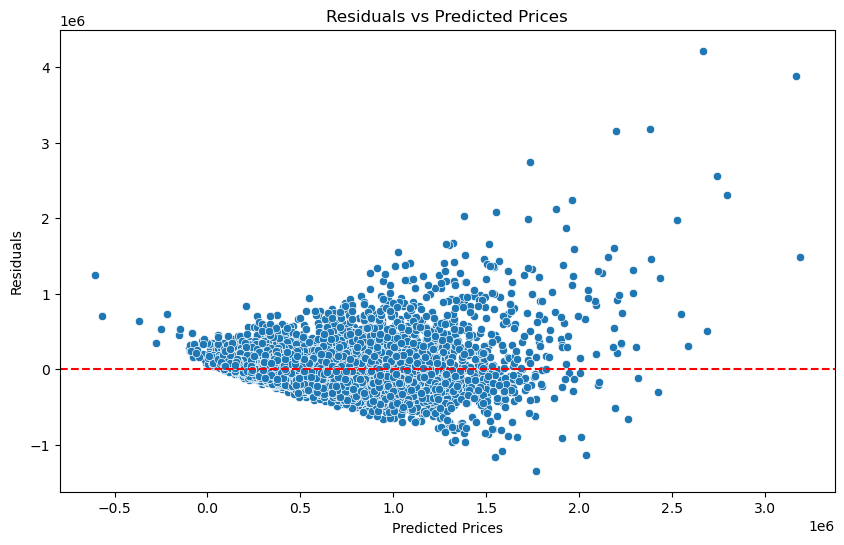

In [14]:
# Step 8: Check for outliers using residuals
y_train_pred = lr_model.predict(X_train)
residuals = y_train - y_train_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices")
plt.show()

### 🔄 **Step 9: Extract Residuals and Remove Outliers Using the IQR Method**

This step focuses on identifying and removing outliers from the training data using the **Interquartile Range (IQR) method** based on the residuals of the Linear Regression model.

---

#### 📝 **Detailed Description**

1. **Extract Residuals from the Regression Model**

   - **Residuals** are the differences between the actual target values and the predicted values.
   - The residuals help in understanding how well the model fits the training data.
   - **Residual Formul*residuals = y_train - y_train_pred*ted}}
     \]

2. **Why Check for Outliers in Residuals?**

   - Outliers in residuals indicate points where the model's predictions are significantly inaccurate.
   - These points can distort the model's performance and affect generalization.

3. **Interquartile Range (IQR) Method**

   - The **IQR method** identifies outliers based on the spread of the middle 50% of the da
### Interquartile Range (IQR) Method

- **IQR Formula**:  
  $$
  \text{IQR} = Q3 - Q1
  $$

- **Lower Bound**:  
  $$
  Q1 - 1.5 \times \text{IQR}
  $$

- **Upper Bound**:  
  $$
  Q3 + 1.5 \times \text{IQR}
  $$
xt{IQR}
  $$
    Q3 + 1.5 \times \text{IQR}
     \]

4. **Removing Outliers**

   - Data points with residuals **outside the lower and upper bounds** are considered outliers.
   - These outliers are removed from the training data to improve model accuracy and robustness.

5. **Combining Features and Target**

   - The training features (`X_train`) and the training target (`y_train`) are combined into a single DataFrame for easy outlier removal.

6. **Benefits of Outlier Removal**

   - **Improves Model Accuracy**: Reduces the impact of extreme values that can skew the model.
   - **Enhances Robustness**: The model becomes more reliable when trained on cleaner data.
   - **Prevents Overfitting**: Reduces the likelihood that the model learns patterns influenced by anomalies.
   - **Maintains Data Integrity**: Systematically identifies and removes outliers using a statistical method.


In [15]:
# Step 9: Extract residuals from the regression model
y_train_pred = lr_model.predict(X_train)
residuals = y_train - y_train_pred

In [18]:
# Step 9: Remove outliers based on IQR method from the residuals
def remove_outliers_iqr(data, residuals):
    Q1 = residuals.quantile(0.25)
    Q3 = residuals.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(residuals >= lower_bound) & (residuals <= upper_bound)], residuals[(residuals >= lower_bound) & (residuals <= upper_bound)]

# Combine X_train and y_train for outlier removal
train_data = X_train.copy()
train_data[target] = y_train

# Remove outliers based on residuals
train_data_clean, residuals_clean = remove_outliers_iqr(train_data, residuals)

# Split the cleaned data into X and y
X_train_clean = train_data_clean.drop(columns=[target])
y_train_clean = train_data_clean[target]


### ⚖️ **Step 10: Scale Features and Recompute VIF (Variance Inflation Factor)**

In this step, we **scale the features** using the `StandardScaler` from `sklearn.preprocessing` and then recompute the **Variance Inflation Factor (VIF)** to check for multicollinearity among the predictors.

📝 Detailed Description
Standardize the Features

StandardScaler() scales the data to have a mean of 0 and a standard deviation of 1.
This ensures that all features are on the same scale, which is important for computing VIF accurately.

**Why Scale the Data?**

VIF calculations are sensitive to the scale of the features.
Scaling the data ensures that features with different units or magnitudes do not distort the VIF values.
Compute VIF

variance_inflation_factor(X_train_clean_scaled, i) calculates the VIF for each feature.
VIF measures how much a feature is correlated with the other features

**Interpreting the VIF**
Low VIF (< 5): Indicates low multicollinearity (acceptable).
Moderate VIF (5-10): Indicates moderate multicollinearity (potential concern).
High VIF (> 10): Indicates high multicollinearity (problematic).
Create a DataFrame for VIF

**vif_data["feature"]: Stores the feature names**
**vif_data["VIF"]: Stores the corresponding VIF values**

**Benefits of Recomputing VIF After Scaling**
Accurate Detection of Multicollinearity: Scaling ensures that VIF values accurately reflect the relationships between features.
Improved Model Stability: Identifying and addressing multicollinearity can improve model performance and interpretation.
Informed Feature Selection: Helps decide which features to retain or remove to reduce redundancy.


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_clean_scaled = scaler.fit_transform(X_train_clean)

# Recompute VIF with scaled data
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_clean.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_clean_scaled, i) for i in range(X_train_clean_scaled.shape[1])]
print(vif_data)


          feature       VIF
0        bedrooms  1.675569
1       bathrooms  2.921783
2          floors  1.943591
3      waterfront  1.119567
4            view  1.277707
5       condition  1.211300
6           grade  2.980468
7      sqft_above  4.764278
8   sqft_basement  1.902381
9    yr_renovated  1.134313
10  sqft_living15  2.904561
11     sqft_lot15  1.080907
12            age  2.069741


### 🔄 **Step 11: Retrain the Linear Regression Model with Cleaned Data**

In this step, we retrain the **Linear Regression model** using the cleaned training data, make predictions on the test set, and evaluate the model using **RMSE** and **R² score**.

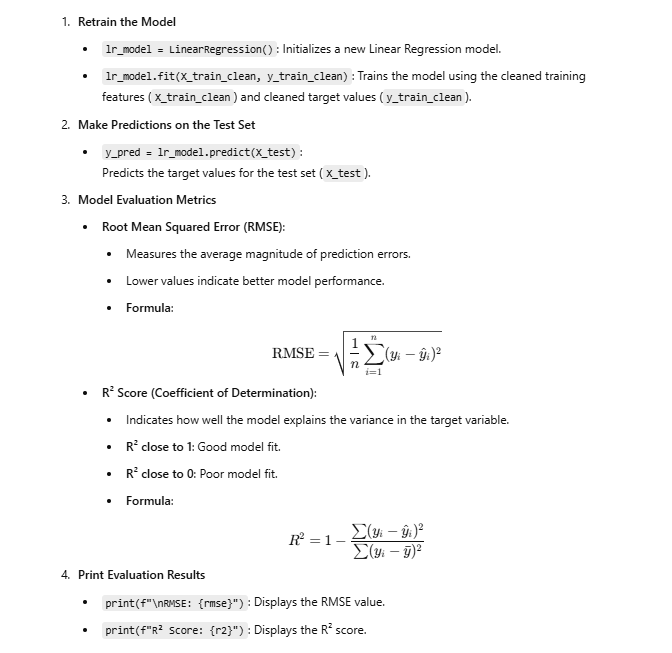

In [26]:
# Step 11: Retrain the Linear Regression model with cleaned data
lr_model = LinearRegression()
lr_model.fit(X_train_clean, y_train_clean)

# Predict on the test set
y_pred = lr_model.predict(X_test)


# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nRMSE: {rmse}")
print(f"R² Score: {r2}")




RMSE: 226291.1894584216
R² Score: 0.6145894039848294


### 📉 **Step 12: Calculate Mean Absolute Percentage Error (MAPE)**

In this step, we calculate the **Mean Absolute Percentage Error (MAPE)** to evaluate the accuracy of the regression model. MAPE measures the average percentage difference between the actual and predicted values.

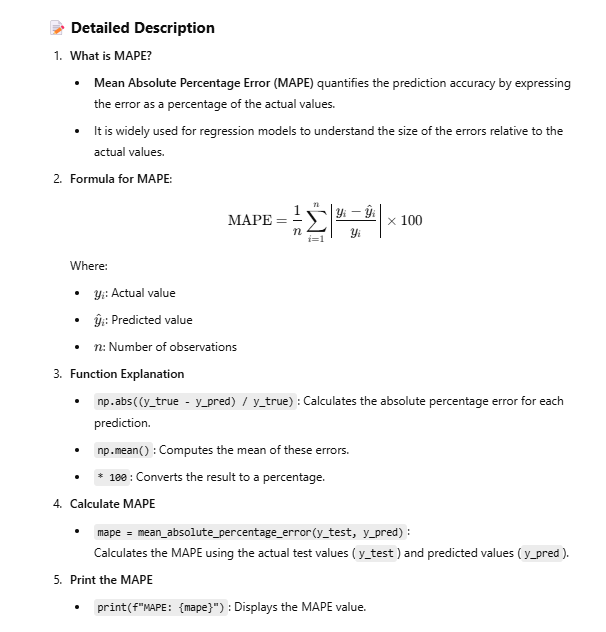


In [33]:
from sklearn.metrics import mean_absolute_percentage_error

# Define the function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print the MAPE
print(f"MAPE: {mape}")


MAPE: 26.873538040654747
